# Openstreetmap et graphes

Utilisation d'openstreetmap pour construire des graphes de réseaux routiers.

Ceci permettra de trouver des chemins de longueurs minimum.

In [1]:
import osmnx as ox

On utilise la bibliothèque OSMnx qui connecte OSM et networkx. Jetez un coup d'oeil aux divers exemples fournis, ils sont éclairant sur les capacités de cette bibliothèque :

<https://github.com/gboeing/osmnx-examples/tree/main/notebooks>

In [2]:
Marseille = ox.graph.graph_from_address('Marseille, France', 1000)

la bibliothèque [osmnx](https://osmnx.readthedocs.io/) récupère d'openstreetmap le graphe des routes de Marseille (on le verra, c'est juste le centre).

Le type de graphe utilisé est un [`MultiDiGraph`](https://networkx.org/documentation/stable/reference/classes/multidigraph.html), c'est l'équivalent d'un multi-graphe (il peut y avoir plusieurs arêtes entre deux sommets) mixte (les arêtes peuvent être dirigées (route à sens unique) ou non (routes à double sens)).

In [3]:
type(Marseille)

networkx.classes.multidigraph.MultiDiGraph

## Dessin

In [4]:
import matplotlib.pyplot as plt

### Directement

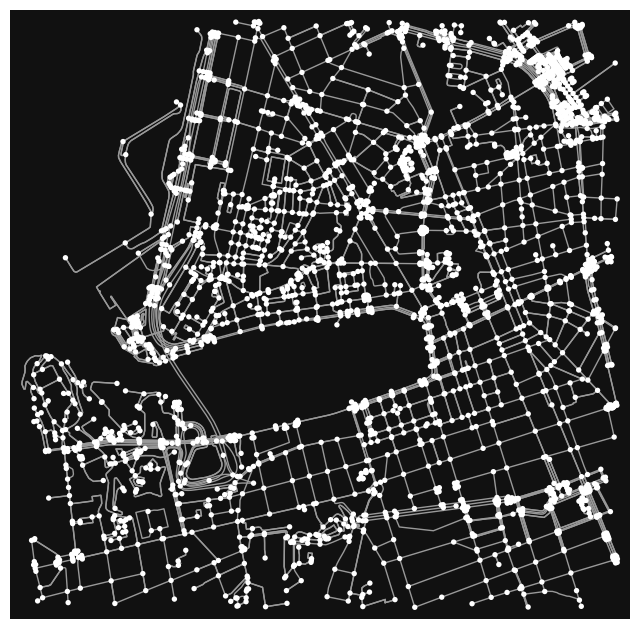

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
ox.plot_graph(Marseille)

Vous devriez voir apparaître (après un certain temps) une fenêtre avec un graphe où l'on devine le [vieux-port de Marseille](https://www.google.fr/maps/@43.2944646,5.3601266,16z).

### Avec matplotlib

On peut aussi utiliser la figure de matplotlib que l'on peut paramétrer ensite.

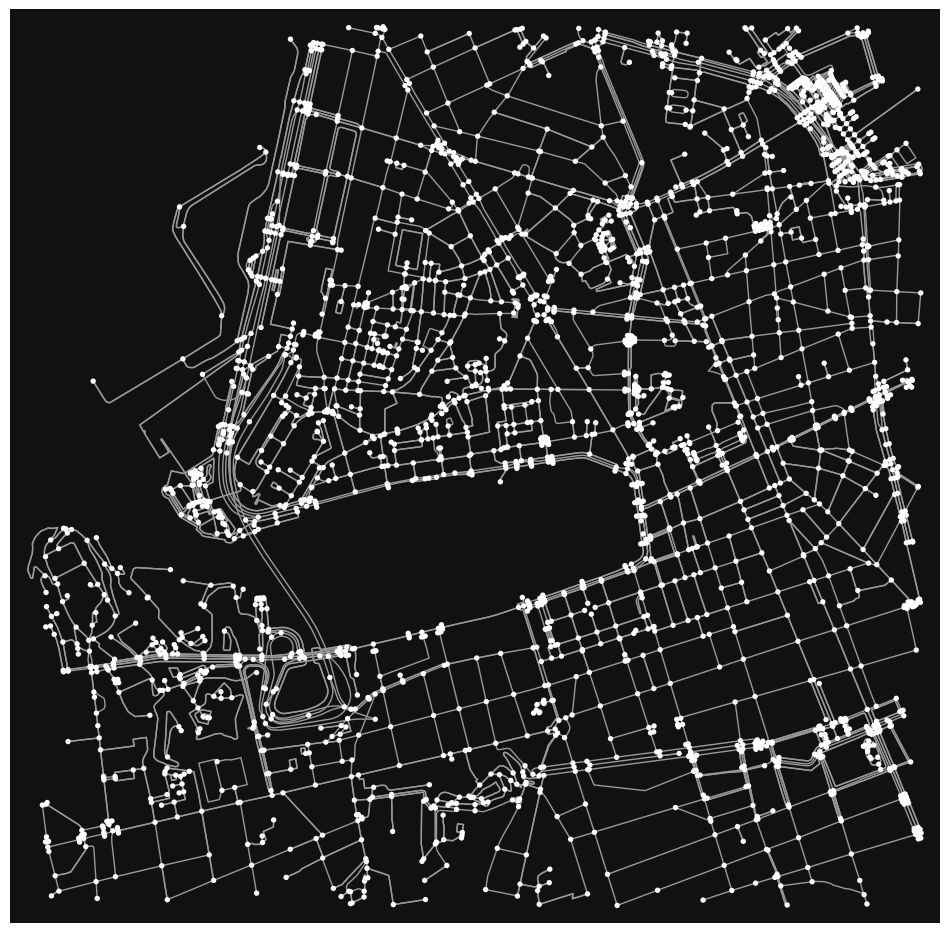

In [6]:
fig, ax = plt.subplots(figsize=(12, 12)) 

ax.set_facecolor("#111111")

ox.plot_graph(Marseille, ax=ax, show=False)
plt.show()

### Réseau routier

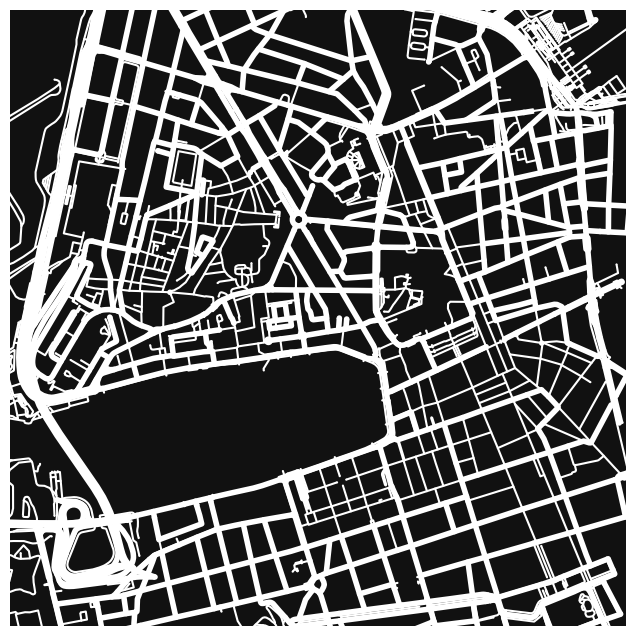

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
ox.plot.plot_figure_ground(Marseille)

## Obtenir des graphes

Il existe plusieurs façons d'obtenir des graphes de réseaux routiers, nous allons en voir trois.

> Il est aussi possible d'obtenir d'autres types de réseaux. Référez vous au paramètre `custom_filter` dans la documentation.

### A partir d'une adresse

<https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_address>


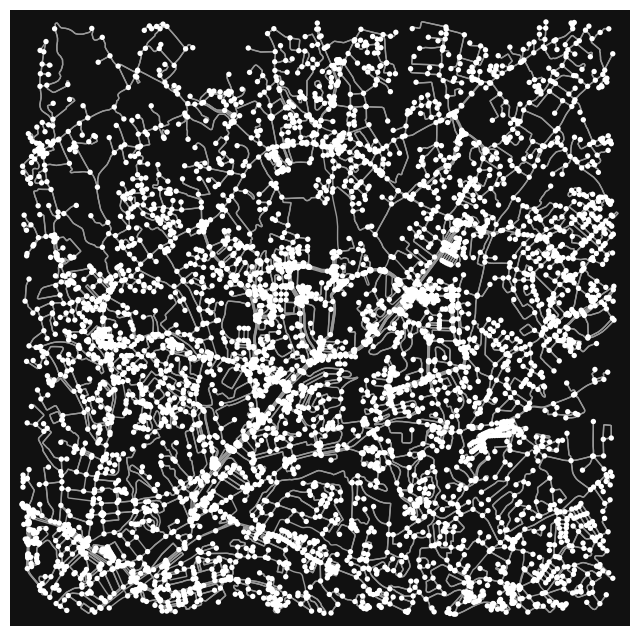

In [8]:
ecm = ox.graph.graph_from_address('Ecole centrale marseille', dist=2000)

fig, ax = ox.plot_graph(ecm, show=False)
plt.show()

Diminuons la distance pour *reconnaître* l'école.

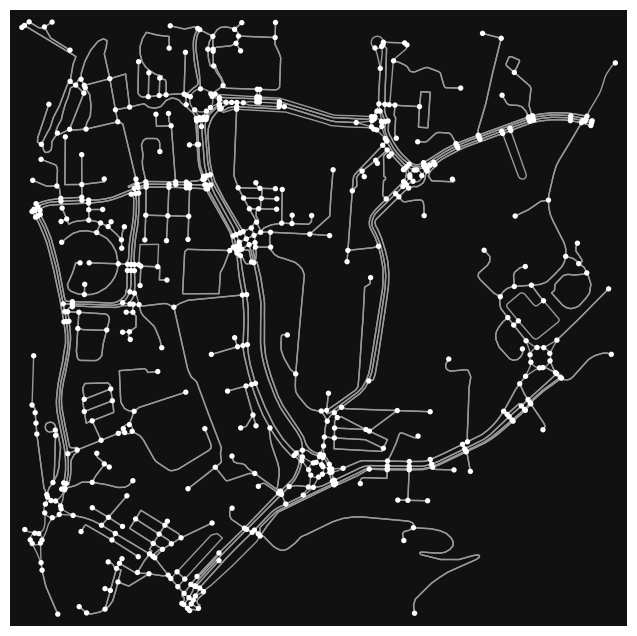

In [9]:
ecm = ox.graph.graph_from_address('Ecole centrale marseille', dist=500)

fig, ax = ox.plot_graph(ecm, show=False)
plt.show()

Notez que si l'on cherche centrale med, cela ne parche pas.

### A partir d'une boite `bbox`

<https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_bbox>

In [73]:
ox.settings.max_query_area_size = 1000 * 50*1000*50*1000

In [ ]:
# prend trop longtemps

# marseille_en_grand = ox.graph.graph_from_bbox((43.388, 43.168, 5.498, 5.295), network_type='drive')
# fig, ax = ox.plot_graph(marseille_en_grand, show=False)
# plt.show()

On peut utiliser <http://norbertrenner.de/osm/bbox.html> pour construire nos `bbox`. 

Faisons celle de l'école, on obtient un truc du genre : 

```
5.43466,43.33865,5.44056,43.34519(left,bottom,right,top)
```

Attention aux coordonnées, la doc nous dis que l'ordre est nord, sud, est, ouest.

In [75]:
ecm = ox.graph.graph_from_bbox((43.34519, 43.33865, 5.44056, 5.43466), network_type='drive')

fig, ax = ox.plot_graph(ecm, show=False)
plt.show()

KeyboardInterrupt: 

On a que les route. Pour voir tous les chemins, on utilise tout le réseau de routes (c'est le paramètre par défaut) :

In [ ]:
ecm = ox.graph.graph_from_bbox((43.34519, 43.33865, 5.44056, 5.43466))

fig, ax = ox.plot_graph(ecm, show=False)
plt.show()

### A partir de coordonnées GPS

<https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_point>


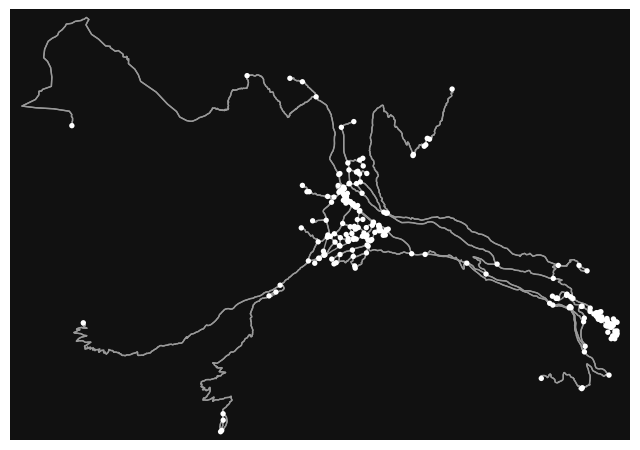

In [11]:
ailefroide = ox.graph.graph_from_point((44.8833273, 6.444307), dist=3000, network_type='all')

fig, ax = ox.plot_graph(ailefroide, show=False)
plt.show()

On peut facilement voir où c'est grace à google maps : <https://www.google.fr/maps/@44.8833273,6.444307,13z>

Les 3 paramètres sont :

1. latitude
2. longitude
3. zoom

### Type de réseau

le paramètre `network_type` permet de déterminer quel réseau routier est utilisé par défaut. D'après la documentation, il y a plusieurs possiblités :

- `"all_private"` (par défaut, tout y compris les chemins privés)
- `"all"`
- `"bike"`
- `"drive"`
- `"drive_service"`
- `"walk"`

Comparons l'ecm à vélo et en voiture :

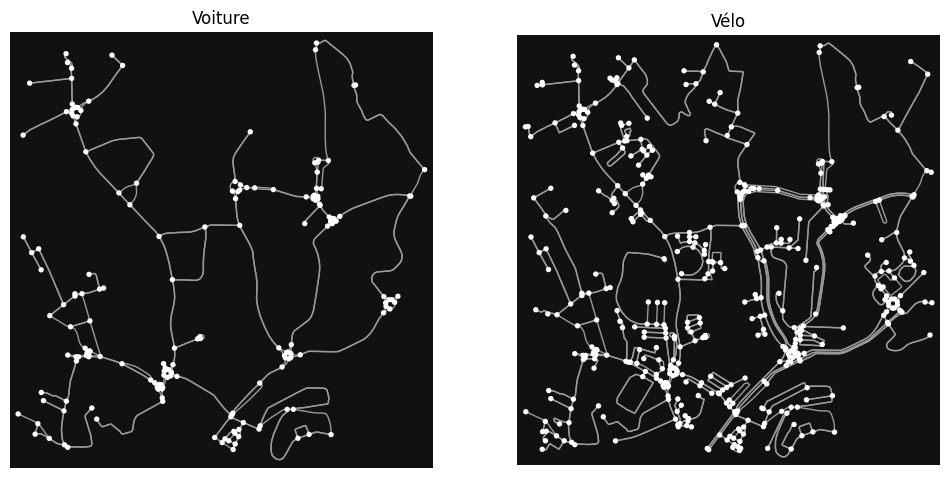

In [12]:
fig, ax = plt.subplots(figsize=(12, 12), ncols=2) 

ax[0].set_facecolor("#111111")
ax[1].set_facecolor("#111111")
ax[0].set_title("Voiture")
ax[1].set_title("Vélo")

ox.plot_graph(ox.graph_from_point((43.3426309, 5.4350088), dist=750, network_type='drive'), ax=ax[0], show=False)
ox.plot_graph(ox.graph_from_point((43.3426309, 5.4350088), dist=750, network_type='bike'), ax=ax[1], show=False)

plt.show()

On remarque les routes sont considérées comme cyclables

## Obtenir des batiments

En plus du réseau routier, openstreetmap met à disposition des features :

<https://wiki.openstreetmap.org/wiki/Map_features>

Qui sont tout les centres d'intérets (building, arrêt de bus, etc)

In [13]:
ecm_features = ox.features_from_point((43.3426309, 5.4350088), tags = {'building': True}, dist=750)

In [14]:
type(ecm_features)

geopandas.geodataframe.GeoDataFrame

In [15]:
ecm_features.head()

geometry  \
element  id                                                           
relation 1582717  POLYGON ((5.43493 43.34489, 5.4348 43.34489, 5...   
         1582718  POLYGON ((5.43306 43.34403, 5.43377 43.34403, ...   
         1582721  POLYGON ((5.43656 43.34388, 5.43657 43.34418, ...   
         1582732  POLYGON ((5.42799 43.3394, 5.42786 43.33965, 5...   
         1582733  POLYGON ((5.43568 43.34205, 5.43571 43.34205, ...   

                    building source wall building:levels  \
element  id                                                
relation 1582717  university    NaN  NaN             NaN   
         1582718  industrial    NaN  NaN             NaN   
         1582721         yes    NaN  NaN             NaN   
         1582732         yes    NaN  NaN             NaN   
         1582733      office    NaN  NaN               3   

                                                      name roof:levels  \
element  id                                                              
relation 1582717                                       CMI         NaN   
         1582718                                       NaN         NaN   
         1582721  Laboratoire d'Astrophysique de Marseille         NaN   
         1582732                                       NaN         NaN   
         1582733                                       NaN           0   

                             amenity contact:housenumber contact:street  ...  \
element  id                                                              ...   
relation 1582717                 NaN                 NaN            NaN  ...   
         1582718                 NaN                 NaN            NaN  ...   
         1582721  research_institute                 NaN            NaN  ...   
         1582732                 NaN                 NaN            NaN  ...   
         1582733                 NaN                 NaN            NaN  ...   

                 check_date location power voltage architect start_date layer  \
element  id                                                                     
relation 1582717        NaN      NaN   NaN     NaN       NaN        NaN   NaN   
         1582718        NaN      NaN   NaN     NaN       NaN        NaN   NaN   
         1582721        NaN      NaN   NaN     NaN       NaN        NaN   NaN   
         1582732        NaN      NaN   NaN     NaN       NaN        NaN   NaN   
         1582733        NaN      NaN   NaN     NaN       NaN        NaN   NaN   

                          type     contact:website research_institution  
element  id                                                              
relation 1582717  multipolygon                 NaN                  NaN  
         1582718  multipolygon                 NaN                  NaN  
         1582721  multipolygon  https://www.lam.fr                  yes  
         1582732  multipolygon                 NaN                  NaN  
         1582733  multipolygon                 NaN                  NaN  

[5 rows x 56 columns]

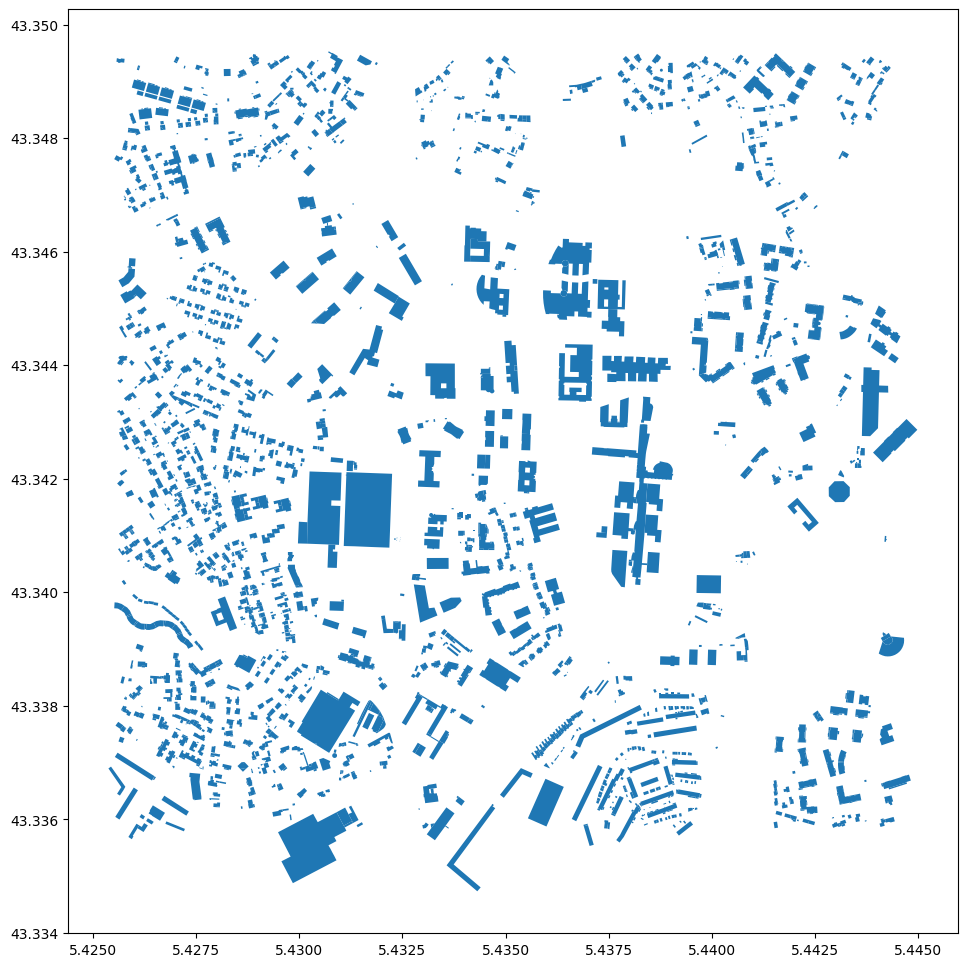

In [16]:
fig, ax = plt.subplots(figsize=(12, 12)) 

ecm_features.plot(ax=ax)

plt.show()

On remarque qu'il manque l'amphi JouLe

## Données


In [17]:
ailefroide.graph

{'created_date': '2025-11-01 15:33:31',
 'created_with': 'OSMnx 2.0.6',
 'crs': 'epsg:4326',
 'simplified': True}

Le CRS [epsg:4326](https://epsg.io/4326) est le crs du GPS, classique. 

### CRS

On peut facilement en changer en utilisant [pyproj](https://pyproj4.github.io/) :

In [18]:
from pyproj import CRS

In [19]:
ailefroide_mercator = ox.projection.project_graph(ailefroide, to_crs=CRS.from_string("epsg:3785"))

Sur un si petit graphe, la forme ne change pas vraiment :

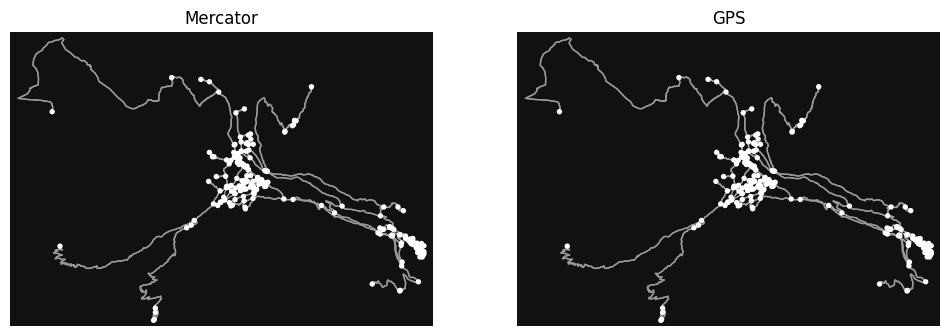

In [20]:
fig, ax = plt.subplots(figsize=(12, 12), ncols=2) 

ax[0].set_facecolor("#111111")
ax[1].set_facecolor("#111111")
ax[0].set_title("Mercator")
ax[1].set_title("GPS")

ox.plot_graph(ailefroide_mercator, ax=ax[0], show=False)
ox.plot_graph(ailefroide, ax=ax[1], show=False)

plt.show()

En revanche, les coordonnées sont très différentes.

In [21]:
ax[0].get_xlim(), ax[0].get_ylim()  # mercator

((np.float64(712569.4781286085), np.float64(721806.1834888346)),
 (np.float64(5600233.333176061), np.float64(5606651.425416287)))

In [22]:
ax[1].get_xlim(), ax[1].get_ylim()  # GPS

((np.float64(6.401120532), np.float64(6.484095268)),
 (np.float64(44.864617328), np.float64(44.905467072)))

### Sommets et arêtes

In [23]:
len(ailefroide.nodes)

221

In [24]:
len(ailefroide.edges)

512

Le graphe a 189 sommets et 453 arêtes (le 7/1/24). 

Chaque sommet est un numéro (comme `268931860`) :

In [25]:
[n for n in ailefroide.nodes][:10]  # 10 premiers sommets

[268931832,
 268931840,
 268931860,
 268931872,
 268931887,
 268931900,
 268932655,
 279458088,
 279458101,
 279458109]

In [26]:
ailefroide.nodes[268931832]

{'y': 44.8768029, 'x': 6.4787532, 'street_count': 3}

les arêtes sont des triplets `(sommet origine, sommet arrivé, numéro d'arête)`. Le numéro d'arête est par défaut 0 (c'est le cas général s'il n'y a qu'une arête par couple de sommet) :

In [27]:
[e for e in ailefroide.edges][:10]  # 10 premières arêtes

[(268931832, 6643877819, 0),
 (268931832, 8926757941, 0),
 (268931832, 6820440005, 0),
 (268931840, 8145719016, 0),
 (268931840, 6820440005, 0),
 (268931860, 8145718967, 0),
 (268931860, 2463949703, 0),
 (268931860, 2459299364, 0),
 (268931872, 2459299372, 0),
 (268931872, 2459299364, 0)]

In [28]:
ailefroide.edges[(268931832, 6643877819, 0)]

{'osmid': 30609779,
 'highway': 'secondary',
 'name': 'Route de Pelvoux',
 'ref': 'D 994E',
 'oneway': False,
 'reversed': True,
 'length': np.float64(47.57652725492107),
 'geometry': <LINESTRING (6.479 44.877, 6.479 44.877, 6.479 44.877)>}

Pour connaître le sommet associé à une coordonnée, on utilise les fonctions :

- [`get_nearest_nodes`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.nearest_nodes)
- [`get_nearest_edges`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.nearest_edges)

Par exemple (**faite attention à l'ordre des coordonnées**) :

In [29]:
sommet = ox.distance.nearest_nodes(ailefroide, 6.41556, 44.91679)
arete = ox.distance.nearest_edges(ailefroide, 6.41556, 44.91679)

In [30]:
sommet

9291435430

In [31]:
arete

(345609942, 9291435430, 0)

In [32]:
ailefroide.nodes[sommet]

{'y': 44.8991651, 'x': 6.4328495, 'street_count': 3}

C'est à dire que le sommet le plus proche est aux coordonnées GPS (44.8707699, 6.4812867) et est de degré 3. C'est [pré de madame Carle](https://fr.wikipedia.org/wiki/Pr%C3%A9_de_Madame_Carle)

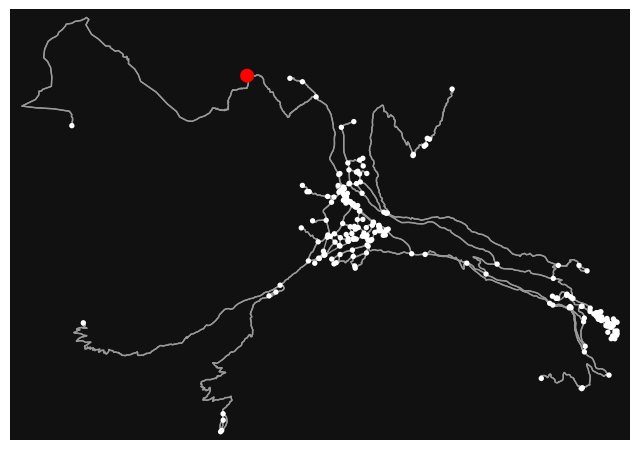

In [33]:
fig, ax = ox.plot_graph(ailefroide, show=False,
                        node_color=["red" if n == sommet else "white" for n in ailefroide.nodes],
                        node_size=[100 if n == sommet else 15 for n in ailefroide.nodes]
                       )

plt.show()

In [34]:
ailefroide.edges[arete]

{'osmid': [1007143257, 71328497, 77676211, 984669139],
 'highway': 'path',
 'oneway': False,
 'reversed': [False, True],
 'length': np.float64(4877.233524172902),
 'geometry': <LINESTRING (6.409 44.894, 6.409 44.895, 6.41 44.895, 6.409 44.895, 6.409 44...>}

C'est une route à sens unique de 5km de longueur (c'est une descente de ski depuis le sommet du pelvoux)

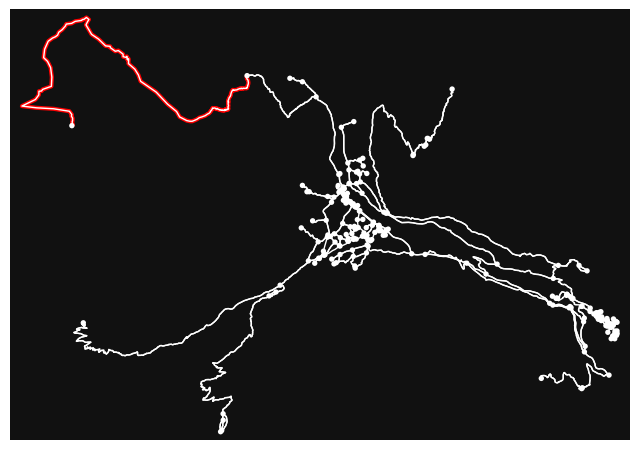

In [35]:
fig, ax = ox.plot_graph(ailefroide, show=False,
                        edge_color=["red" if e == arete else "white" for e in ailefroide.edges],
                        edge_linewidth=[3 if e == arete else 1 for e in ailefroide.edges]
                       )

plt.show()

Il doit y avoir plusieurs routes qui passent par notre route et donc selon l'ordre d'affichage notre arete est en-dessous des autres. 

Utilisons une autre fonction : [`plot_graph_route`](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.plot.plot_graph_route) :

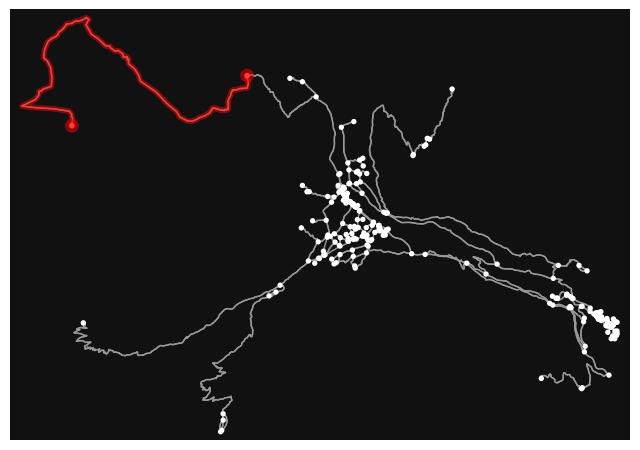

In [36]:
fig, ax = ox.plot_graph_route(ailefroide, [arete[0], arete[1]])

On peut mettre le réeau routier en surbrillance :

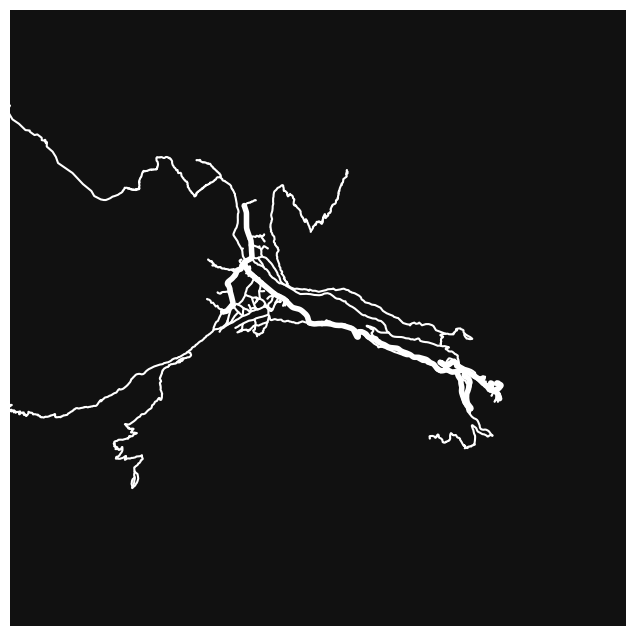

In [37]:
fig, ax = ox.plot_figure_ground(ailefroide, dist=3500, show=False)

plt.show()

Mais le système de coordonnée est tout autre :

In [38]:
ailefroide.nodes[sommet]

{'y': 44.8991651, 'x': 6.4328495, 'street_count': 3}

In [39]:
ailefroide_mercator.nodes[sommet]

{'y': np.float64(5605661.039045489),
 'x': np.float64(716101.5306897644),
 'street_count': np.int64(3)}

## Fond de cartes

Pour ajouter un fond de carte à notre graphe il faut :

1. un fond de carte
2. s'assurer que la carte et le graphe ont le même crs
3. transformer le graphe en geodataframe
4. supperposer les deux dessins.

On utilise [contextily](https://contextily.readthedocs.io/) pour les fond de cartes (au format GPS, on a donc pas à transformer le CRS de notre graphe) :

In [40]:
import contextily as ctx

Conversion du graphe en 2 Geodataframes, l'un pour les sommet, l'autre pour les arêtes :

In [41]:
ailefroide_sommets_gdf, ailefroide_arêtes_gdf = ox.graph_to_gdfs(ailefroide)

In [42]:
type(ailefroide_arêtes_gdf)

geopandas.geodataframe.GeoDataFrame

In [43]:
ailefroide_arêtes_gdf.head()

osmid  \
u         v          key                                                      
268931832 6643877819 0                                             30609779   
          8926757941 0                                            127871454   
          6820440005 0        [835441912, 151527750, 747096237, 1186223238]   
268931840 8145719016 0                                            904701311   
          6820440005 0    [151527750, 30609775, 30609776, 835441913, 238...   

                            highway              name     ref  oneway  \
u         v          key                                                
268931832 6643877819 0    secondary  Route de Pelvoux  D 994E   False   
          8926757941 0         path               NaN     NaN   False   
          6820440005 0    secondary               NaN  D 994E   False   
268931840 8145719016 0    secondary               NaN  D 994E   False   
          6820440005 0    secondary  Tunnel des Claux  D 994E   False   

                         reversed      length  \
u         v          key                        
268931832 6643877819 0       True   47.576527   
          8926757941 0      False   39.582387   
          6820440005 0      False  100.357477   
268931840 8145719016 0      False   39.058711   
          6820440005 0       True  181.250669   

                                                                   geometry  \
u         v          key                                                      
268931832 6643877819 0    LINESTRING (6.47875 44.8768, 6.47912 44.87664,...   
          8926757941 0    LINESTRING (6.47875 44.8768, 6.47879 44.87683,...   
          6820440005 0    LINESTRING (6.47875 44.8768, 6.47873 44.87681,...   
268931840 8145719016 0      LINESTRING (6.47798 44.87618, 6.47788 44.87583)   
          6820440005 0    LINESTRING (6.47798 44.87618, 6.47799 44.87628...   

                         bridge tunnel access width service  
u         v          key                                     
268931832 6643877819 0      NaN    NaN    NaN   NaN     NaN  
          8926757941 0      NaN    NaN    NaN   NaN     NaN  
          6820440005 0      NaN    NaN    NaN   NaN     NaN  
268931840 8145719016 0      NaN    NaN    NaN   NaN     NaN  
          6820440005 0      yes    yes    NaN   NaN     NaN

Si on ne veut que les arêtes on peut aussi :

In [44]:
ailefroide_gdf = ox.graph_to_gdfs(ailefroide, nodes=False)

Cette conversion au format geopandas des arêtes du graphe permet de travailler directement avec des geodataframes.

In [45]:
ailefroide_gdf.index[0]

(np.int64(268931832), np.int64(6643877819), np.int64(0))

In [46]:
ailefroide_gdf.iloc[0]

osmid                                                30609779
highway                                             secondary
name                                         Route de Pelvoux
ref                                                    D 994E
oneway                                                  False
reversed                                                 True
length                                              47.576527
geometry    LINESTRING (6.4787532 44.8768029, 6.4791213 44...
bridge                                                    NaN
tunnel                                                    NaN
access                                                    NaN
width                                                     NaN
service                                                   NaN
Name: (268931832, 6643877819, 0), dtype: object

On peut alors avoir directement accès à toutes les manipulations graphiques que l'on a vu précédemment, en comme la supperposition de la carte et du graphe. 

In [47]:
import xyzservices.providers as xyz

[]

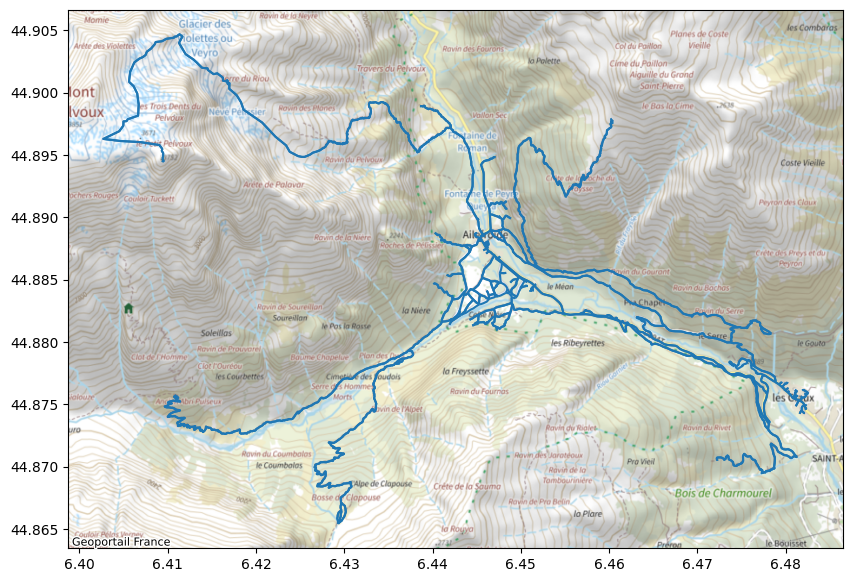

In [48]:
fig, ax = plt.subplots(figsize=(10, 10)) 


ailefroide_gdf.plot(ax=ax)
ctx.add_basemap(ax, crs=ailefroide_gdf.crs.to_string(), 
                source=xyz.GeoportailFrance.plan)

plt.plot()

Ce genre d'approche vous permer de combiner de créer des cartes très détaillées, puisque l'on peut ajouter ce que l'on veut, en particuliers les features associées à la carte :

In [49]:
aiefroide_features = ox.features_from_point((44.8833273, 6.444307), dist=3000,
                                            tags = {'amenity': True})

[]

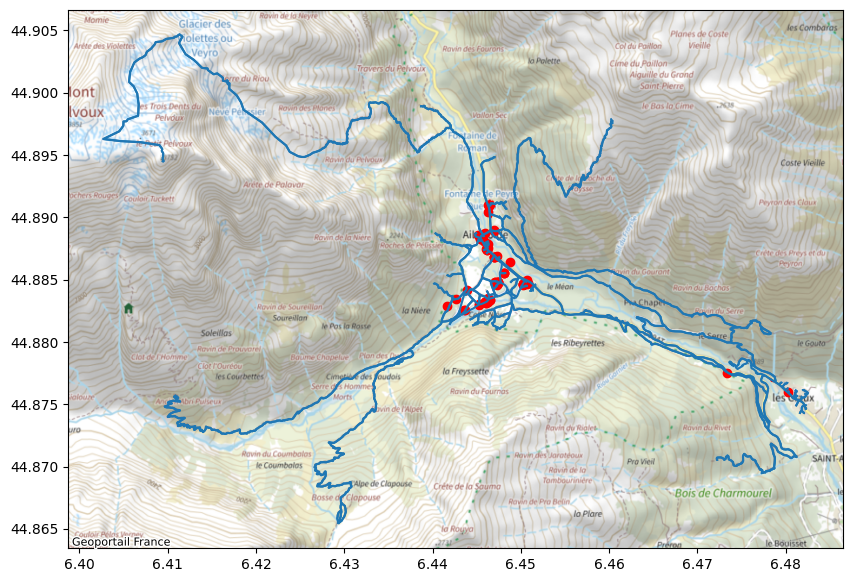

In [50]:
fig, ax = plt.subplots(figsize=(10, 10)) 

ailefroide_gdf.plot(ax=ax)
ctx.add_basemap(ax, crs=ailefroide_gdf.crs.to_string(), 
                source=xyz.GeoportailFrance.plan)
aiefroide_features.plot(ax=ax, color="red")

plt.plot()

## Chemins

On veut aller de l'école à deep pour acheter du café.

> TBD : trouver dans marseille en grands le sommet le plus proche de l'ecm et de deep
> puis faire un chemin le plus court et l'afficher

### Détermination des sommets de départ et d'arrivée

Si l'on ne connait pas les coordonnées GPS des points de départ et d'arrivée d'arrivées on puet les trouver en utilisant OSM via ;la bibliothèque [`geopy`](https://geopy.readthedocs.io/) (qui devrait déjà être installée via une dépendance).

In [51]:
import geopy

from geopy.geocoders import Nominatim  # décodeur OSM
geolocator = Nominatim(user_agent="juterlab cours ecm")

Faisons une requête pour trouver le départ :

In [52]:
départ = geolocator.geocode("Ecole centrale marseille, france")

In [53]:
départ

Location(École centrale de Marseille, 38, Rue Frédéric Joliot Curie, Château-Gombert, Marseille 13e Arrondissement, Marseille, Bouches-du-Rhône, Provence-Alpes-Côte d'Azur, France métropolitaine, 13013, France, (43.3414223, 5.4379082, 0.0))

In [54]:
type(départ)

geopy.location.Location

En lisant la [doc](https://geopy.readthedocs.io/en/latest/index.html#geopy.location.Location) on trouve les coordonnées recherchées :

In [55]:
départ.point

Point(43.3414223, 5.4379082, 0.0)

In [56]:
arrivée = geolocator.geocode("café deep, marseille, france")

In [57]:
arrivée

Location(Deep Coffee, 15, Rue Glandevès, Opéra, Marseille 1er Arrondissement, Marseille, Bouches-du-Rhône, Provence-Alpes-Côte d'Azur, France métropolitaine, 13001, France, (43.2934981, 5.3751491, 0.0))

### Sommet assocées

Trouvons les sommets associés sur le graphe (attention à l'ordre des coordonnées) :

In [58]:
départ_sommet = ox.nearest_nodes(marseille_en_grand, départ.point[1], départ.point[0]) 
arrivée_sommet = ox.nearest_nodes(marseille_en_grand, arrivée.point[1], arrivée.point[0]) 

NameError: name 'marseille_en_grand' is not defined

In [ ]:
départ_sommet, arrivée_sommet

In [ ]:
fig, ax = ox.plot_graph(marseille_en_grand, show=False,
                        node_color=["red" if n in (départ_sommet, arrivée_sommet) else "white" for n in marseille_en_grand.nodes],
                        node_size=[100 if n in (départ_sommet, arrivée_sommet) else 15 for n in marseille_en_grand.nodes]
                       )

plt.show()

### Route

On utilise [`shortest_path`](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.routing.shortest_path) qui permet de trouver un chemin le plus court selon le poid considéré. Allons-y le plus vite possible.

In [ ]:
route = ox.shortest_path(marseille_en_grand, départ_sommet, arrivée_sommet, weight='travel_time')

La fonction rend une liste de sommets :

In [ ]:
len(route)

In [ ]:
route[:10]  # les dix premiers sommets

Que l'on peut afficher :

In [ ]:
fig, ax = ox.plot_graph_route(marseille_en_grand, route)

Le chemin le plus court prend la L2 jusqu'au vieux port, mais ne compte pas le temps pour trouver une place de parking gratuite.

## Coordonnées géographiques

On a déjà vu les formes géométriques Point et Polygon du format geojson. Les arêtes du graphe utilisent une autre primitive, les [`LineString`](https://shapely.readthedocs.io/en/stable/reference/shapely.LineString.html).

Considérons uniquement le geodataframe des arêtes utilisées pour aller de l'ecm à deep. Pour celà on va travailler par étapes :

1. créer le geodataframe des arêtes du graphe de marseille
2. trouver les arêtes du chemins (notre route est une suite de sommets
3. restreindre le geodataframe à ces arêtes

In [ ]:
marseille_en_grand_gdf = ox.graph_to_gdfs(marseille_en_grand, nodes=False)

In [ ]:
arêtes = [(route[i], route[i+1], 0) for i in range(len(route)-1)]

In [ ]:
chemin = marseille_en_grand_gdf.loc[marseille_en_grand_gdf.index.isin(arêtes)]

In [ ]:
chemin

Il y a 61 lignes à notre geodataframe (ce qui est cohérent avec les 62 sommets de la route) que l'on peut représenter graphiquement :

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))

chemin.plot(ax=ax)

plt.show()

Comparons ce dessoin à ce que l'on aurait eu si l'on avait juste utilisé des segments entre les différents sommets 

In [ ]:
from shapely.geometry import Point, LineString

In [ ]:
rows = []
for i in range(len(route) - 1):
    x = Point(marseille_en_grand.nodes[route[i]]['x'], marseille_en_grand.nodes[route[i]]['y'])
    y = Point(marseille_en_grand.nodes[route[i + 1]]['x'], marseille_en_grand.nodes[route[i + 1]]['y'])
    row = {'orig': route[i], 
           'dest': route[i+1],
           'geometry': LineString([x, y])}
    rows.append(row)

In [ ]:
import geopandas as gpd

In [ ]:
gdf = gpd.GeoDataFrame(rows)

On a crée un geodataframe dont les LineString sont des segments :

In [ ]:
gdf

In [ ]:
fig, ax = plt.subplots(figsize=(20,12), ncols=2)

ax[0].set_title("Segments")
ax[1].set_title("Courbes")

gdf.plot(ax=ax[0])
chemin.plot(ax=ax[1])

plt.show()

Finissons cette partie en représentant les deux chemins sur la même carte :

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10)) 

ax.axis(False)

chemin.plot(ax=ax, color="red")
gdf.plot(ax=ax, color="blue")
ctx.add_basemap(ax, crs=chemin.crs.to_string())


plt.plot()